In [3]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
investigadores = pd.read_csv("data/mapeo_investigadores.csv")
investigadores

,ID investigador,Nombre,Género,Descripción,Universidad,Departamento / Centro,Grupo de investigación / Laboratorio,Latitude,Longitude,Área de procedencia/disciplina,...,Dialnet,Facebook,Google Scholar,Research Gate,Twitter,Web personal,Fuente de información,Fecha de publicación,Última actualización,Estado
0,1438,"Abadal, Ernest",Masculino,Catedrático de la Facultat de Biblioteconomia ...,Universidad de Barcelona,Comunicación,Grupo de Investigación Cultura y contenidos di...,41.386608,2.164020,"Biblioteconomía y documentación, Filosofía",...,https://dialnet.unirioja.es/servlet/autor?codi...,https://www.facebook.com/ernest.abadal,https://scholar.google.com/citations?user=P0xn...,https://www.researchgate.net/profile/Ernest_Ab...,https://twitter.com/abadal?lang=es,https://fbd.ub.edu/pub/abadal/es/qui-soc,Bibliografía,24 Sep 2019,02 Nov 2019,Borrador
1,2417,"Abarca-Alvarez, Francisco Javier",Masculino,\r\n\tArquitecto (Granada 2001). Experto en Ur...,Universidad de Granada,Departamento de Urbanística y Ordenación del T...,NaN,37.184443,-3.600575,Urbanismo,...,NaN,NaN,NaN,NaN,NaN,http://wpd.ugr.es/~fcoabarca/,Proyectos MediaLab UGR,27 Nov 2019,27 Nov 2019,Borrador
2,1542,"Adroher Auroux, Andrés Mª",Masculino,NaN,Universidad de Granada,Prehistoria y Arqueología,NaN,37.183940,-3.601018,Arqueología,...,https://dialnet.unirioja.es/servlet/autor?codi...,NaN,https://scholar.google.es/citations?user=5S5Ua...,https://www.researchgate.net/profile/Andres_Ad...,NaN,NaN,Proyectos MediaLab UGR,14 Oct 2019,02 Nov 2019,Borrador
3,1372,"Agenjo Bullón, Xavier",Masculino,Miembro del Cuerpo Facultativo de Bibliotecari...,Fundación Ignacio Larramendi,NaN,NaN,40.443357,-3.700509,Biblioteconomía y documentación,...,https://dialnet.unirioja.es/servlet/autor?codi...,https://www.facebook.com/xavier.agenjo,https://scholar.google.com/citations?user=yu0K...,https://www.researchgate.net/profile/Xavier_Ag...,https://twitter.com/xabuci,NaN,GrinUGR,08 Sep 2019,02 Nov 2019,Borrador
4,1437,"Aguaded Gómez, José Ignacio",Masculino,Es un catedrático español de la Universidad de...,Universidad de Huelva,Educación,Grupo Comunicar,37.270368,-6.922983,Ciencias de la educación,...,https://dialnet.unirioja.es/servlet/autor?codi...,NaN,https://scholar.google.es/citations?user=w2lbS...,https://www.researchgate.net/profile/Ignacio_A...,https://twitter.com/aguaded,NaN,Bibliografía,24 Sep 2019,02 Nov 2019,Borrador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,1494,"Vitalaru, Bianca",Femenino,Bianca Vitalaru es doctora en Lenguas Modernas...,Universidad de Alcalá,Filología,Grupo de investigación FITISPos-UAH,40.482472,-3.362867,Filología,...,https://dialnet.unirioja.es/servlet/autor?codi...,https://www.facebook.com/people/Bianca-Vitalar...,NaN,https://www.researchgate.net/profile/Bianca_Vi...,NaN,NaN,Congreso Territorio digitales,09 Oct 2019,02 Nov 2019,Borrador
583,2492,"Zalama, Miguel Ángel",Masculino,Miguel Ángel Zalama Rodríguez es catedrático d...,Universidad de Valladolid,Historia,Arte poder y sociedad en la Edad Moderna,41.656927,-4.714055,Historia,...,https://dialnet.unirioja.es/servlet/autor?codi...,NaN,NaN,NaN,NaN,NaN,Agencia Estatal de Investigación,10 Dec 2019,10 Dec 2019,Borrador
584,1828,"Zorita Vicente, Luis",Masculino,NaN,Universidad Nacional de Educación a Distancia ...,Ciencias de la computación,NaN,40.438006,-3.704070,Ciencias de la computación,...,NaN,NaN,NaN,NaN,NaN,NaN,Fuente propia,18 Oct 2019,02 Nov 2019,Borrador
585,1829,"Zozaya Montes, Leonor",Femenino,Leonor Zozaya es profesora en la ULPGC. Es doc...,Universidad de Las Palmas de Gran Canaria,Historia,NaN,28.099189,-15.419919,Historia,...,https://dialnet.unirioja.es/servlet/autor?codi...,NaN,https://scholar.google.pt/citations?user=XiCP3...,https://www.researchgate.net/profile/Leonor_Zo...,https://twitter.com/leonorzozaya,https://about.me/leonorzozaya,Bibliografía,18 Oct 2019,02 Nov 2019,Borrador


In [16]:
#preprocessing
coords = investigadores.iloc[:,7:9]
investigadores["Latitude"] = pd.to_numeric(investigadores["Latitude"], errors='coerce')
investigadores["Longitude"] = pd.to_numeric(investigadores["Longitude"], errors='coerce')
coords

,Latitude,Longitude
0,41.386608,2.164020
1,37.184443,-3.600575
2,37.183940,-3.601018
3,40.443357,-3.700509
4,37.270368,-6.922983
...,...,...
582,40.482472,-3.362867
583,41.656927,-4.714055
584,40.438006,-3.704070
585,28.099189,-15.419919


In [7]:
investigadores.head()

,ID investigador,Nombre,Descripción,Universidad,Departamento / Centro,Grupo de investigación / Laboratorio,Latitude,Longitude,Temas de investigación,Dialnet,Facebook,Google Scholar,Research Gate,Twitter,Web personal,Fuente de información,Fecha de publicación,Última actualización,Estado
0,1438,"Abadal, Ernest",Catedrático de la Facultat de Biblioteconomia ...,Universidad de Barcelona,Comunicación,Grupo de Investigación Cultura y contenidos di...,41.386608,2.164020,Comunicación digital; Literatura Digital; GLAM...,https://dialnet.unirioja.es/servlet/autor?codi...,https://www.facebook.com/ernest.abadal,https://scholar.google.com/citations?user=P0xn...,https://www.researchgate.net/profile/Ernest_Ab...,https://twitter.com/abadal?lang=es,https://fbd.ub.edu/pub/abadal/es/qui-soc,Bibliografía,24 Sep 2019,02 Nov 2019,Borrador
1,1542,"Adroher Auroux, Andrés Mª",NaN,Universidad de Granada,Prehistoria y Arqueología,NaN,37.183940,-3.601018,Modelado de datos,https://dialnet.unirioja.es/servlet/autor?codi...,NaN,https://scholar.google.es/citations?user=5S5Ua...,https://www.researchgate.net/profile/Andres_Ad...,NaN,NaN,Proyectos MediaLab UGR,14 Oct 2019,02 Nov 2019,Borrador
2,1372,"Agenjo Bullón, Xavier",Miembro del Cuerpo Facultativo de Bibliotecari...,Fundación Ignacio Larramendi,NaN,NaN,40.443357,-3.700509,"GLAM, galerías, bibliotecas, archivos y museos...",https://dialnet.unirioja.es/servlet/autor?codi...,https://www.facebook.com/xavier.agenjo,https://scholar.google.com/citations?user=yu0K...,https://www.researchgate.net/profile/Xavier_Ag...,https://twitter.com/xabuci,NaN,GrinUGR,08 Sep 2019,02 Nov 2019,Borrador
3,1437,"Aguaded Gómez, José Ignacio",Es un catedrático español de la Universidad de...,Universidad de Huelva,Educación,Grupo Comunicar,37.270368,-6.922983,Medios audiovisuales; Comunicación digital,https://dialnet.unirioja.es/servlet/autor?codi...,NaN,https://scholar.google.es/citations?user=w2lbS...,https://www.researchgate.net/profile/Ignacio_A...,https://twitter.com/aguaded,NaN,Bibliografía,24 Sep 2019,02 Nov 2019,Borrador
4,180,"Aguilar Cuevas, Lourdes",Lourdes Aguilar se doctoró en Filología Españo...,Universidad de Barcelona,Filología,Prosodic Studies Group (GrEP),41.386608,2.164020,Lingüística computacional,https://dialnet.unirioja.es/servlet/autor?codi...,NaN,https://scholar.google.es/citations?user=ebmHd...,https://www.researchgate.net/profile/Lourdes_A...,NaN,http://filcat.uab.cat/clt/lourdes-aguilar/,Fundación BBVA,19 Aug 2019,02 Nov 2019,Borrador


A GeoDataFrame needs a shapely object. 
We use geopandas points_from_xy() to transform Longitude and Latitude into a list of shapely.Point objects 
and set it as a geometry while creating the GeoDataFrame

In [18]:
gdf = geopandas.GeoDataFrame(
    investigadores, geometry=geopandas.points_from_xy(investigadores.Longitude, investigadores.Latitude))

In [19]:
gdf.head()

,ID investigador,Nombre,Género,Descripción,Universidad,Departamento / Centro,Grupo de investigación / Laboratorio,Latitude,Longitude,Área de procedencia/disciplina,...,Facebook,Google Scholar,Research Gate,Twitter,Web personal,Fuente de información,Fecha de publicación,Última actualización,Estado,geometry
0,1438,"Abadal, Ernest",Masculino,Catedrático de la Facultat de Biblioteconomia ...,Universidad de Barcelona,Comunicación,Grupo de Investigación Cultura y contenidos di...,41.386608,2.164020,"Biblioteconomía y documentación, Filosofía",...,https://www.facebook.com/ernest.abadal,https://scholar.google.com/citations?user=P0xn...,https://www.researchgate.net/profile/Ernest_Ab...,https://twitter.com/abadal?lang=es,https://fbd.ub.edu/pub/abadal/es/qui-soc,Bibliografía,24 Sep 2019,02 Nov 2019,Borrador,POINT (2.16402 41.38661)
1,2417,"Abarca-Alvarez, Francisco Javier",Masculino,\r\n\tArquitecto (Granada 2001). Experto en Ur...,Universidad de Granada,Departamento de Urbanística y Ordenación del T...,NaN,37.184443,-3.600575,Urbanismo,...,NaN,NaN,NaN,NaN,http://wpd.ugr.es/~fcoabarca/,Proyectos MediaLab UGR,27 Nov 2019,27 Nov 2019,Borrador,POINT (-3.60058 37.18444)
2,1542,"Adroher Auroux, Andrés Mª",Masculino,NaN,Universidad de Granada,Prehistoria y Arqueología,NaN,37.183940,-3.601018,Arqueología,...,NaN,https://scholar.google.es/citations?user=5S5Ua...,https://www.researchgate.net/profile/Andres_Ad...,NaN,NaN,Proyectos MediaLab UGR,14 Oct 2019,02 Nov 2019,Borrador,POINT (-3.60102 37.18394)
3,1372,"Agenjo Bullón, Xavier",Masculino,Miembro del Cuerpo Facultativo de Bibliotecari...,Fundación Ignacio Larramendi,NaN,NaN,40.443357,-3.700509,Biblioteconomía y documentación,...,https://www.facebook.com/xavier.agenjo,https://scholar.google.com/citations?user=yu0K...,https://www.researchgate.net/profile/Xavier_Ag...,https://twitter.com/xabuci,NaN,GrinUGR,08 Sep 2019,02 Nov 2019,Borrador,POINT (-3.70051 40.44336)
4,1437,"Aguaded Gómez, José Ignacio",Masculino,Es un catedrático español de la Universidad de...,Universidad de Huelva,Educación,Grupo Comunicar,37.270368,-6.922983,Ciencias de la educación,...,NaN,https://scholar.google.es/citations?user=w2lbS...,https://www.researchgate.net/profile/Ignacio_A...,https://twitter.com/aguaded,NaN,Bibliografía,24 Sep 2019,02 Nov 2019,Borrador,POINT (-6.92298 37.27037)


In [20]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

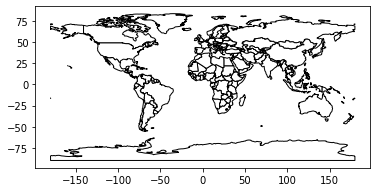

In [23]:
ax = world.plot(color='white', edgecolor='black')

In [25]:
gdf.plot(ax=ax, color='red')
plt.show()

<Figure size 432x288 with 0 Axes>

In [29]:
import geoplot

ModuleNotFoundError: No module named 'geoplot'

In [163]:
investigadores.tail()

,ID investigador,Nombre,Género,Descripción,Universidad,Departamento / Centro,Grupo de investigación / Laboratorio,Latitude,Longitude,Área de procedencia/disciplina,...,Google Scholar,Research Gate,Twitter,Web personal,Fuente de información,Fecha de publicación,Última actualización,Estado,geometry,Location
582,1494,"Vitalaru, Bianca",Femenino,Bianca Vitalaru es doctora en Lenguas Modernas...,Universidad de Alcalá,Filología,Grupo de investigación FITISPos-UAH,40.482472,-3.362867,Filología,...,NaN,https://www.researchgate.net/profile/Bianca_Vi...,NaN,NaN,Congreso Territorio digitales,09 Oct 2019,02 Nov 2019,Borrador,POINT (-3.36287 40.48247),"(-374352.68657330296, 4936303.531864032)"
583,2492,"Zalama, Miguel Ángel",Masculino,Miguel Ángel Zalama Rodríguez es catedrático d...,Universidad de Valladolid,Historia,Arte poder y sociedad en la Edad Moderna,41.656927,-4.714055,Historia,...,NaN,NaN,NaN,NaN,Agencia Estatal de Investigación,10 Dec 2019,10 Dec 2019,Borrador,POINT (-4.71405 41.65693),"(-524766.1687756402, 5109726.520178013)"
584,1828,"Zorita Vicente, Luis",Masculino,NaN,Universidad Nacional de Educación a Distancia ...,Ciencias de la computación,NaN,40.438006,-3.704070,Ciencias de la computación,...,NaN,NaN,NaN,NaN,Fuente propia,18 Oct 2019,02 Nov 2019,Borrador,POINT (-3.70407 40.43801),"(-412335.13060290215, 4929797.70620808)"
585,1829,"Zozaya Montes, Leonor",Femenino,Leonor Zozaya es profesora en la ULPGC. Es doc...,Universidad de Las Palmas de Gran Canaria,Historia,NaN,28.099189,-15.419919,Historia,...,https://scholar.google.pt/citations?user=XiCP3...,https://www.researchgate.net/profile/Leonor_Zo...,https://twitter.com/leonorzozaya,https://about.me/leonorzozaya,Bibliografía,18 Oct 2019,02 Nov 2019,Borrador,POINT (-15.41992 28.09919),"(-1716537.4977576812, 3261485.0059335367)"
586,211,"Zurita Aldeguer, Rafael",Masculino,"Rafael Zurita (Universidad de Alicante), perte...",Universidad de Alicante,Humanidades,NaN,38.385245,-0.514316,Historia,...,NaN,NaN,NaN,https://dhcon.ua.es/es/historia-contemporanea/...,Web personal,20 Aug 2019,02 Nov 2019,Borrador,POINT (-0.51432 38.38524),"(-57253.40635877943, 4633991.814838573)"


In [113]:
# transformacion de coordenadas al formato de bokeh
import math
def merc(x, y):
    lat = y
    lon = x
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale    
    return (x, y)


In [167]:
n = investigadores.Location.nunique()

In [121]:
import math

# derived from the Java version explained here: http://wiki.openstreetmap.org/wiki/Mercator
RADIUS = 6378137.0 # in meters on the equator

def lat2y(a):
  return math.log(math.tan(math.pi / 4 + math.radians(a) / 2)) * RADIUS

def lon2x(a):
  return math.radians(a) * RADIUS

In [114]:
merc(41.5656411245578, 2.1215498656)

(4627066.004481725, 236223.83700136846)

In [135]:
lista_mercator = []
for index, x in enumerate(investigadores.Longitude.values):
    y = investigadores.iloc[index, 7]
    print(x, y)
    lista_mercator.append((lon2x(x) , lat2y(y)))

2.1640199999999368 41.386608
-3.6005752999999463 37.1844433
-3.6010181999999986 37.1839398
-3.700509199999942 40.4433571
-6.922983499999987 37.2703682
2.1640199999999368 41.386608
2.1945431999999983 41.406498
-0.5143160999999736 38.3852446
-3.6010181999999986 37.1839398
-1.08106429999998 40.333468200000006
2.1640199999999368 41.386608
-0.5143160999999736 38.3852446
-3.920497899999986 38.99404390000001
-80.27712529999997 25.7191685
-15.419918700000038 28.099188899999998
-5.666925099999957 40.9613376
-4.4160927000000365 36.7199506
-5.937404099999981 37.3552405
-3.933118799999989 38.9794482
2.1945431999999983 41.406498
-3.7299424000000267 40.445436799999996
-3.362867400000028 40.482472200000004
-3.628939299999956 40.4366411
-3.687040900000056 40.4407083
nan nan
-3.70406950000006 40.438005600000004
-0.8339307999999619 41.7562122
-3.6010181999999986 37.1839398
-5.5603697999999895 42.6122612
-3.70406950000006 40.438005600000004
2.1048538000000008 41.5019255
-1.6597421000000168 42.8014994
-0.

In [153]:
lista_x = []
lista_y = []
for i in lista_mercator:
    lista_x.append(i[0])
    lista_y.append(i[1])

In [137]:

investigadores.Location.head()

0      (240897.60446645282, 5069534.589644621)
1    (-400814.20895883226, 4464847.0821677195)
2      (-400863.5123613104, 4464776.729970387)
3      (-411938.7998198177, 4930580.446355857)
4      (-770662.9979902334, 4476859.930581358)
Name: Location, dtype: object

In [148]:
investigadores.Location[0]

(240897.60446645282, 5069534.589644621)

In [186]:
np.linspace(1, 2, 587)

array([1.        , 1.00170648, 1.00341297, 1.00511945, 1.00682594,
       1.00853242, 1.01023891, 1.01194539, 1.01365188, 1.01535836,
       1.01706485, 1.01877133, 1.02047782, 1.0221843 , 1.02389078,
       1.02559727, 1.02730375, 1.02901024, 1.03071672, 1.03242321,
       1.03412969, 1.03583618, 1.03754266, 1.03924915, 1.04095563,
       1.04266212, 1.0443686 , 1.04607509, 1.04778157, 1.04948805,
       1.05119454, 1.05290102, 1.05460751, 1.05631399, 1.05802048,
       1.05972696, 1.06143345, 1.06313993, 1.06484642, 1.0665529 ,
       1.06825939, 1.06996587, 1.07167235, 1.07337884, 1.07508532,
       1.07679181, 1.07849829, 1.08020478, 1.08191126, 1.08361775,
       1.08532423, 1.08703072, 1.0887372 , 1.09044369, 1.09215017,
       1.09385666, 1.09556314, 1.09726962, 1.09897611, 1.10068259,
       1.10238908, 1.10409556, 1.10580205, 1.10750853, 1.10921502,
       1.1109215 , 1.11262799, 1.11433447, 1.11604096, 1.11774744,
       1.11945392, 1.12116041, 1.12286689, 1.12457338, 1.12627

In [322]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models import WheelZoomTool

p = figure(x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(CARTODBPOSITRON)
p.circle(x = lista_x,
         y = lista_y,
         size=size_list_2)
p.tags = size_list
p.select(tags=size_list)
p.toolbar.active_scroll = p.select_one(WheelZoomTool) 
output_notebook()
show(p)

Loading BokehJS ...

In [307]:
dups_color = investigadores.pivot_table(index=['Location'], aggfunc='size')
dups_color.head(20)

dict_caca = {}
for index, coord in enumerate(df2.num):
    dict_caca.update({str(df2.iloc[index, 0]): str(df2.iloc[index, 1])})


In [225]:
df2 = dups_color.to_frame().reset_index()
df2.columns = ['Location', 'num']

In [242]:
df2.iloc[0, 0]

(-11241231.367779369, 2929780.9297360936)

In [249]:
dict_caca


{'(-11241231.367779369, 2929780.9297360936)': '1',
 '(-9406938.877014216, 4583756.690641926)': '1',
 '(-8936408.710743815, 2964340.129786806)': '1',
 '(nan, nan)': '1',
 '(-7922440.568263894, 5211376.307740858)': '1',
 '(-1816271.479338333, 3309765.2697921745)': '11',
 '(-1716537.4977576812, 3261485.0059335367)': '10',
 '(-1019491.1699600397, 4686303.598429385)': '2',
 '(-966762.8452422585, 5186443.166964822)': '1',
 '(-951221.998674468, 5295019.1984008495)': '24',
 '(-937773.0568457276, 5368504.019462109)': '1',
 '(-937772.1885536942, 4896346.706161998)': '1',
 '(-933976.6725914577, 5368603.5892016115)': '9',
 '(-933973.6224374074, 5368605.702505099)': '1',
 '(-779825.983576161, 4704990.608876478)': '3',
 '(-770662.9979902334, 4476859.930581358)': '2',
 '(-701367.9953331065, 4374850.697764116)': '3',
 '(-701062.167296049, 4374336.734618382)': '1',
 '(-668885.9586631022, 4494799.9940095395)': '1',
 '(-666940.7507490234, 4492313.253536478)': '19',
 '(-660948.8010458925, 4488739.08467633

In [241]:
df2.iloc[[1], [0]].values[0]

array([(-9406938.877014216, 4583756.690641926)], dtype=object)

In [246]:
df2

,Location,num
0,"(-11241231.367779369, 2929780.9297360936)",1
1,"(-9406938.877014216, 4583756.690641926)",1
2,"(-8936408.710743815, 2964340.129786806)",1
3,"(nan, nan)",1
4,"(-7922440.568263894, 5211376.307740858)",1
...,...,...
112,"(1491039.7929947122, 6893598.576461542)",1
113,"(1896267.7470968552, 6641484.770142876)",1
114,"(2010188.5517509864, 8259081.714118585)",1
115,"(nan, nan)",1


In [289]:
size_list = []
for coord in investigadores.Location:
    size_list.append(dict_caca[str(coord)])

In [252]:
size_list

['30',
 '1',
 '37',
 '2',
 '2',
 '30',
 '8',
 '17',
 '37',
 '1',
 '30',
 '17',
 '12',
 '1',
 '10',
 '15',
 '15',
 '1',
 '1',
 '8',
 '42',
 '9',
 '14',
 '1',
 '1',
 '31',
 '2',
 '37',
 '5',
 '31',
 '21',
 '11',
 '7',
 '1',
 '19',
 '11',
 '30',
 '11',
 '11',
 '4',
 '10',
 '15',
 '24',
 '42',
 '42',
 '9',
 '12',
 '11',
 '31',
 '9',
 '7',
 '19',
 '30',
 '17',
 '11',
 '4',
 '42',
 '31',
 '21',
 '15',
 '1',
 '5',
 '5',
 '37',
 '1',
 '1',
 '8',
 '11',
 '37',
 '11',
 '3',
 '3',
 '4',
 '4',
 '2',
 '8',
 '2',
 '37',
 '1',
 '2',
 '30',
 '19',
 '1',
 '1',
 '24',
 '9',
 '12',
 '42',
 '17',
 '11',
 '5',
 '31',
 '30',
 '19',
 '11',
 '12',
 '3',
 '2',
 '8',
 '1',
 '1',
 '2',
 '31',
 '31',
 '8',
 '17',
 '7',
 '15',
 '12',
 '15',
 '31',
 '37',
 '6',
 '9',
 '42',
 '17',
 '10',
 '31',
 '19',
 '31',
 '15',
 '37',
 '31',
 '15',
 '30',
 '42',
 '11',
 '37',
 '1',
 '12',
 '10',
 '9',
 '11',
 '21',
 '11',
 '8',
 '19',
 '30',
 '42',
 '2',
 '11',
 '15',
 '15',
 '21',
 '31',
 '42',
 '11',
 '1',
 '14',
 '15',
 '12'

In [272]:
size_list_2 = []
for coord in investigadores.Location:
    size_list_2.append(dict_caca[str(coord)])

In [274]:
size_list_2 = size_list

In [308]:
for idx, e in enumerate(size_list):
    size_list_2[idx] = str((int(e)/2)+2)

In [296]:
size_list_2

['0.005555555555555556',
 '5.0',
 '0.003652300949598247',
 '1.25',
 '1.25',
 '0.005555555555555556',
 '0.078125',
 '0.01730103806228374',
 '0.003652300949598247',
 '5.0',
 '0.005555555555555556',
 '0.01730103806228374',
 '0.034722222222222224',
 '5.0',
 '0.05',
 '0.022222222222222223',
 '0.022222222222222223',
 '5.0',
 '5.0',
 '0.078125',
 '0.002834467120181406',
 '0.06172839506172839',
 '0.02551020408163265',
 '5.0',
 '5.0',
 '0.005202913631633716',
 '1.25',
 '0.003652300949598247',
 '0.2',
 '0.005202913631633716',
 '0.011337868480725623',
 '0.04132231404958678',
 '0.1020408163265306',
 '5.0',
 '0.013850415512465374',
 '0.04132231404958678',
 '0.005555555555555556',
 '0.04132231404958678',
 '0.04132231404958678',
 '0.3125',
 '0.05',
 '0.022222222222222223',
 '0.008680555555555556',
 '0.002834467120181406',
 '0.002834467120181406',
 '0.06172839506172839',
 '0.034722222222222224',
 '0.04132231404958678',
 '0.005202913631633716',
 '0.06172839506172839',
 '0.1020408163265306',
 '0.0138504